In [1]:
import itertools
import numpy as np
import pickle
import matplotlib.pyplot as plt

import sys
import os
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

Load : File  3
Transform : File  3
Training : File  3
Confusion matrix, without normalization
[[ 0  0  0  0  1  0  0  0  1  5  1  2  2]
 [ 0  0  0  0  0  0  0  0  6  0  1  0  0]
 [ 0  0  0  0  1  0  0  0 12  0  1  1  0]
 [ 0  0  0  0  0  1  0  0  6  0  0  0  0]
 [ 0  0  0  0  0  1  0  1  2  0  0  0  2]
 [ 0  0  0  0  0  0  0  1 10  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  4]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0 11  1  0  0  4]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  0  4  0  1  0]
 [ 0  0  0  0  0  0  0  0  2  0  1  0  4]]
Normalized confusion matrix
[[ 0.    0.    0.    0.    0.08  0.    0.    0.    0.08  0.42  0.08  0.17
   0.17]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.86  0.    0.14  0.    0.  ]
 [ 0.    0.    0.    0.    0.07  0.    0.    0.    0.8   0.    0.07  0.07
   0.  ]
 [ 0.    0.    0.    0.    0.    0.14  0.    0.    0.86  0.    0.    0.    0.  ]
 [ 

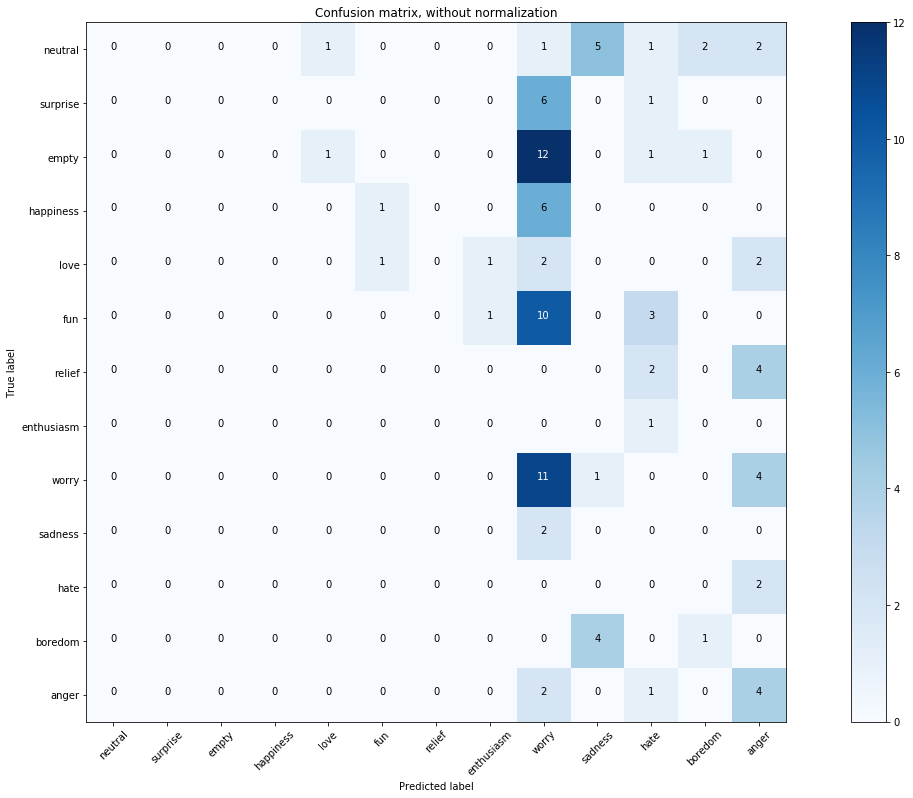

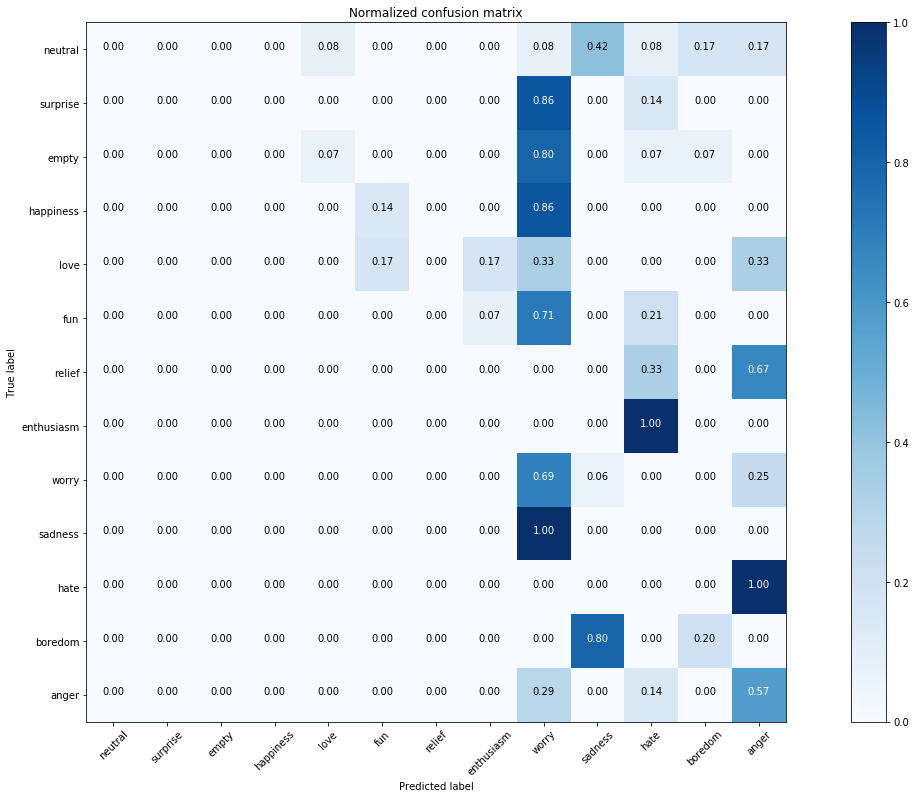

Minute : 0.06589300632476806
Hour : 0.0010982167720794678


In [4]:
full_program_time_1 = time.time()
for i in range(3, 4):
    
    #Load the file from pickle
    print('Load : File ', i)
    
    pkl_file = open('outputs/pkl/preprocessed_data_3.pkl', 'rb')
    data = pickle.load(pkl_file)
    pkl_file.close()
    
    #Read the test data which is real data
    pkl_file = open('outputs/pkl/preprocessed_test_data_1.pkl', 'rb')
    testdata = pickle.load(pkl_file)
    pkl_file.close()

    if i >= 6:
        
        #Untokenize the data
        print('Untokenize : File ', i)
        
        count = 0
        for line in data.content:
            data.content[count] = "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in line]).strip()
            count = count + 1
    
    
    X_train = data.content
    y_train = data.sentiment
    
    X_test = testdata.content
    y_test = testdata.sentiment
    
    
    class_names = ['neutral', 'surprise', 'empty', 'happiness', 'love', 'fun', 'relief', 'enthusiasm', 'worry', 'sadness', 'hate', 'boredom', 'anger']
    
    vectorizer = TfidfVectorizer(min_df = 5,
                                max_df = 0.8,
                                sublinear_tf = True,
                                use_idf = True)

    #Split the data into 7:3 ratio
#     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 123)
    
    
    #Transform the words to feature vectors
    
    print('Transform : File ', i)
    
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    
    
    
    print('Training : File ', i)
    
    nb_classifier_b = BernoulliNB()
    nb_classifier_b_result = nb_classifier_b.fit(X_train, y_train)
    y_pred = nb_classifier_b.predict(X_test)
    
    
    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    fig1 = plt.figure()
    fig1 = plt.gcf()
    fig1.set_size_inches(18.5, 11)
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    fig2 = plt.figure()
    fig2 = plt.gcf()
    fig2.set_size_inches(18.5, 11)
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()
    
    fig1.savefig('Outputs/graph/nb/nb_cm_nn_%s_result.png'%i, bbox_inches = 'tight')
    fig2.savefig('Outputs/graph/nb/nb_cm_n_%s_result.png'%i, bbox_inches = 'tight')
    
    
full_program_time_2 = time.time()
second = full_program_time_2 - full_program_time_1
minute = second/60
hour = minute/60
print('Minute :', minute)
print('Hour :', hour)